<AxesSubplot: xlabel='Month'>

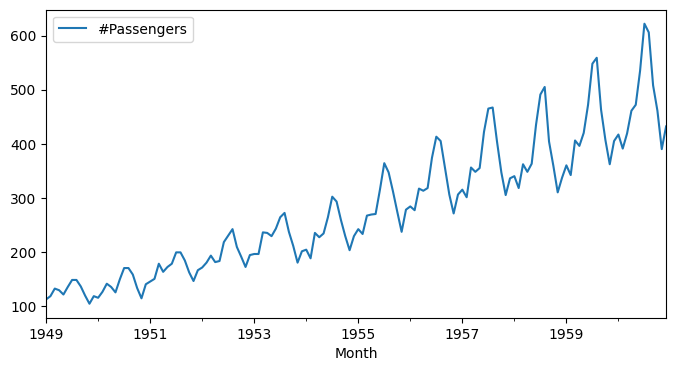

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
air = pd.read_csv('airpass.csv',index_col=0,parse_dates=True)
air.plot(figsize=(8,4))

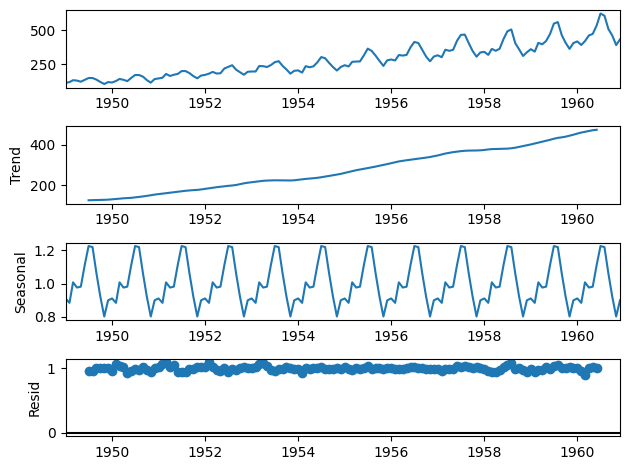

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(air,model='multiplicative')
decompose_result.plot();


<AxesSubplot: xlabel='Month'>

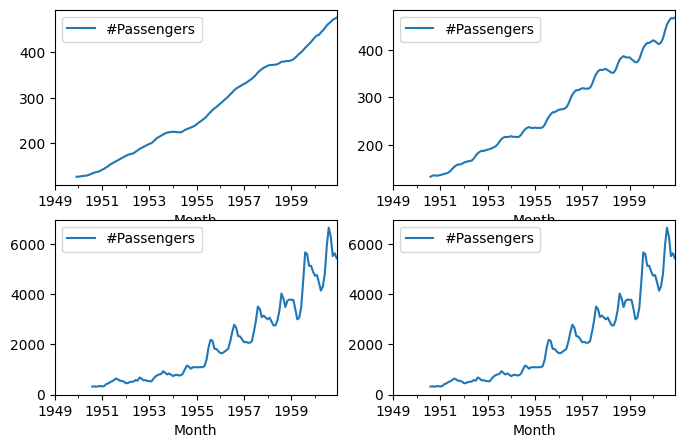

In [4]:
ax1 = plt.subplot(2,2,1)#rolling mean
air.rolling(window=12).mean().plot(figsize=(8,5),ax=ax1)
ax2 = plt.subplot(2,2,2)
air.rolling(window=20).mean().plot(figsize=(8,5),ax=ax2)
ax3 = plt.subplot(2,2,3)#rolling variance
air.rolling(window=20).var().plot(figsize=(8,5),ax=ax3)
ax4 = plt.subplot(2,2,4)
air.rolling(window=20).var().plot(figsize=(8,5),ax=ax4)

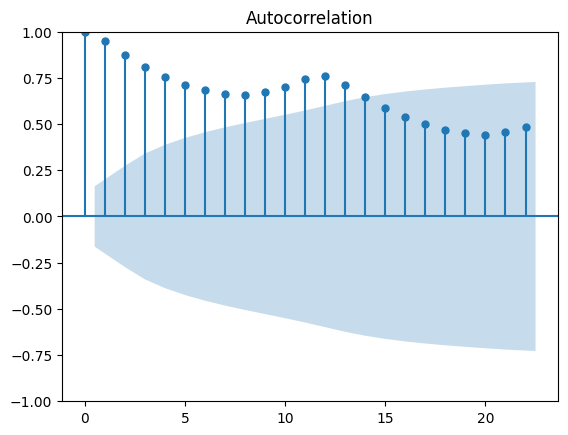

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(air);

In [6]:
#Dickyfuller test for seasonality
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(air['#Passengers'],autolag = 'AIC')
print('1.ADF:',dftest[0])
print('2. P-value',dftest[1])
print('3. Num of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5. Critical Values:')
for key,val in dftest[4].items():
    print("\t",key,':',val)

1.ADF: 0.8153688792060482
2. P-value 0.991880243437641
3. Num of lags: 13
4.No of observations: 130
5. Critical Values:
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


<AxesSubplot: xlabel='Month'>

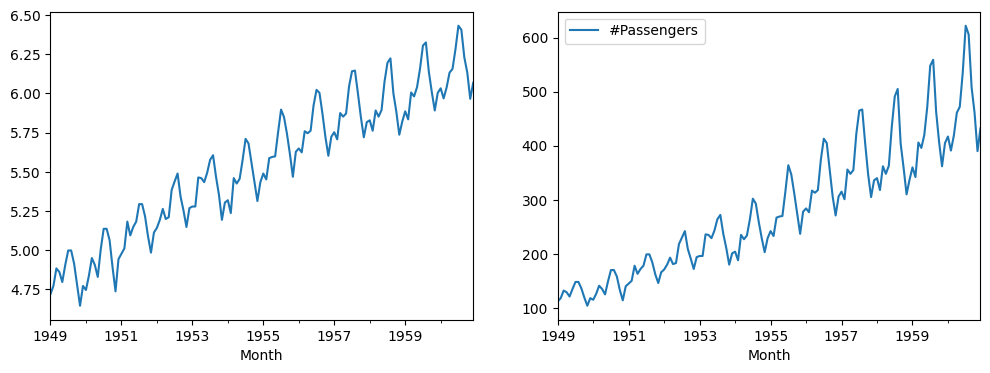

In [7]:
#Remove trend log transofrmations
log = air['#Passengers'].apply(lambda x: np.log(x))
ax1 = plt.subplot(1,2,1)
log.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)


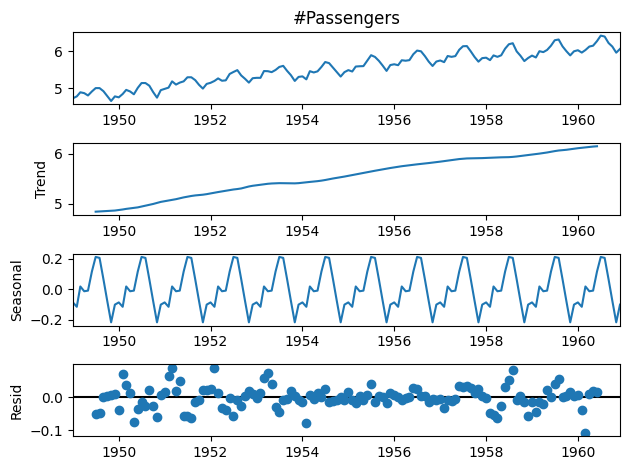

In [8]:
decompose_result = seasonal_decompose(log)
decompose_result.plot();

<AxesSubplot: xlabel='Month'>

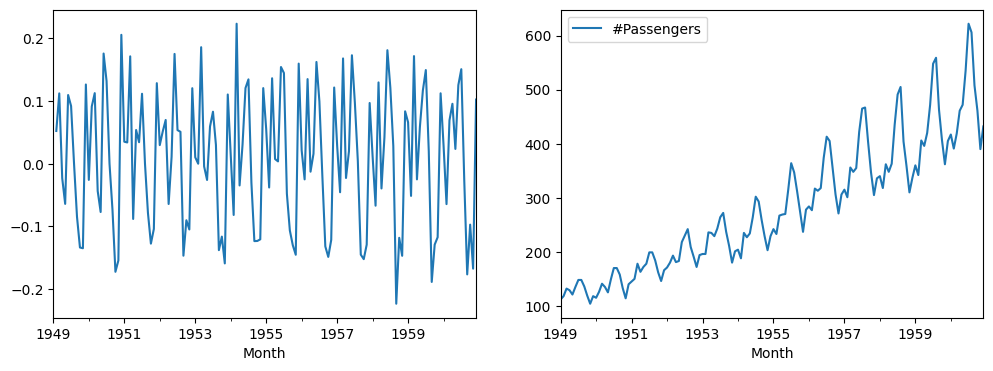

In [9]:
#log diffferenced
log_diff = log - log.shift()
ax1 = plt.subplot(1,2,1)
log_diff.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

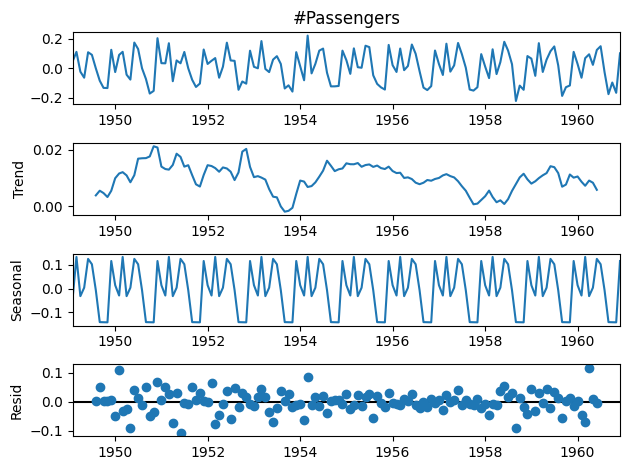

In [10]:
decompose_result = seasonal_decompose(log_diff.dropna())
decompose_result.plot();

In [11]:
#Dickyfuller test for seasonality
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(log_diff.dropna().values,autolag = 'AIC')
print('1.ADF:',dftest[0])
print('2. P-value',dftest[1])
print('3. Num of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5. Critical Values:')
for key,val in dftest[4].items():
    print("\t",key,':',val)

1.ADF: -2.717130598388133
2. P-value 0.07112054815085875
3. Num of lags: 14
4.No of observations: 128
5. Critical Values:
	 1% : -3.4825006939887997
	 5% : -2.884397984161377
	 10% : -2.578960197753906


<AxesSubplot: xlabel='Month'>

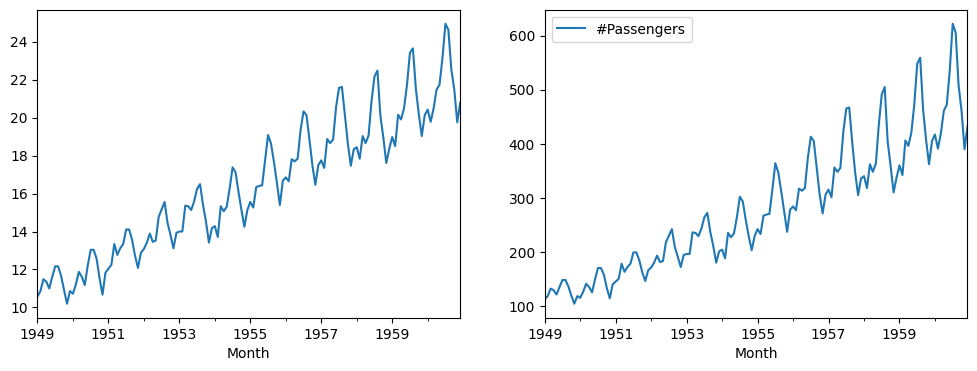

In [12]:
#power transformation
power = air['#Passengers'].apply(lambda x: x**0.5)
ax1 = plt.subplot(1,2,1)
power.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

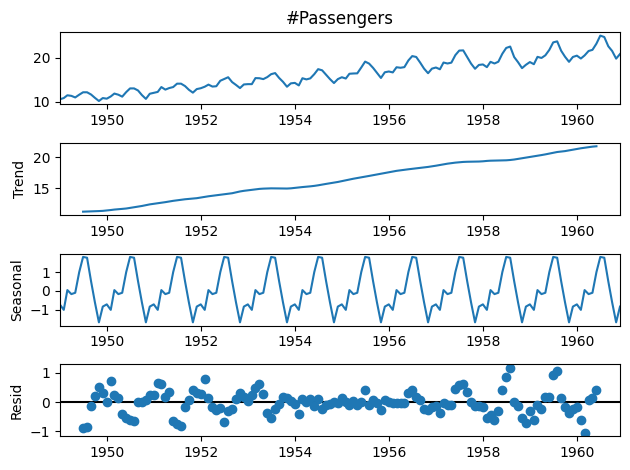

In [13]:
decompose_result = seasonal_decompose(power)
decompose_result.plot();

<AxesSubplot: xlabel='Month'>

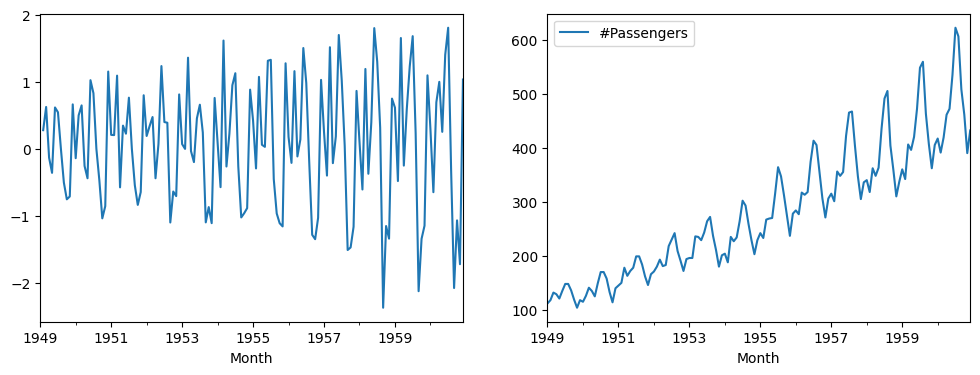

In [14]:
#power diff
power_diff = power - power.shift()
ax1 = plt.subplot(1,2,1)
power_diff.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

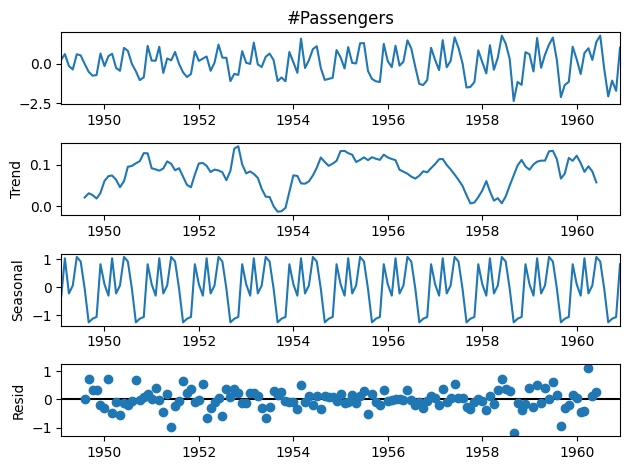

In [15]:
decompose_result = seasonal_decompose(power_diff.dropna())
decompose_result.plot();

In [16]:
#Dickyfuller test for seasonality
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(power_diff.dropna().values,autolag = 'AIC')
print('1.ADF:',dftest[0])
print('2. P-value',dftest[1])
print('3. Num of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5. Critical Values:')
for key,val in dftest[4].items():
    print("\t",key,':',val)

1.ADF: -3.1864222911642144
2. P-value 0.020784185571266895
3. Num of lags: 12
4.No of observations: 130
5. Critical Values:
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


<AxesSubplot: xlabel='Month'>

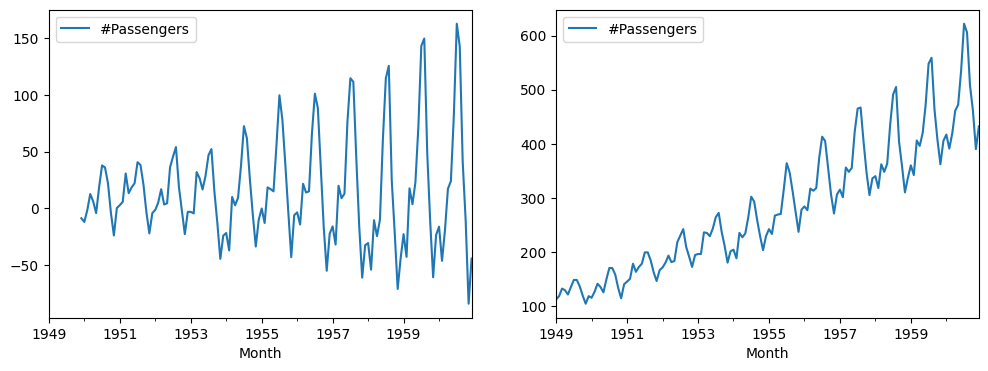

In [61]:
#moving window function
rollingmean = air.rolling(window=12).mean()
air_detrended = air - rollingmean
ax1 = plt.subplot(1,2,1)
air_detrended.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

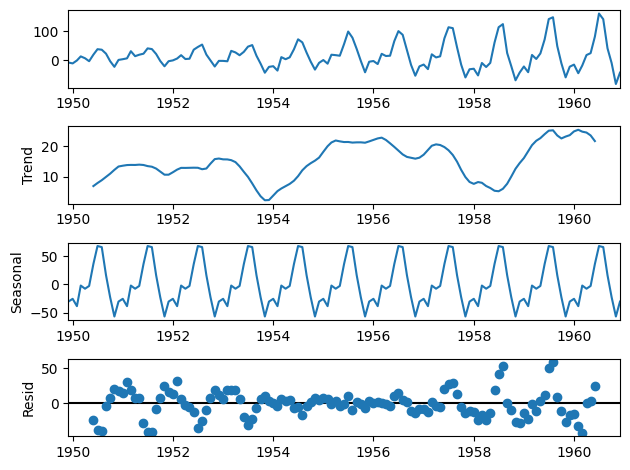

In [67]:
decompose_result = seasonal_decompose(air_detrended.dropna())
decompose_result.plot();

<AxesSubplot: xlabel='Month'>

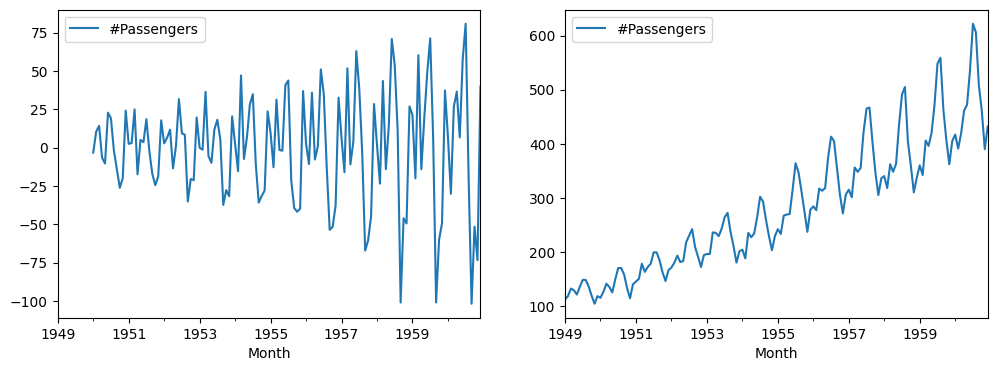

In [63]:
air_detrended_diff = air_detrended -air_detrended.shift()
ax1 = plt.subplot(1,2,1)
air_detrended_diff.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

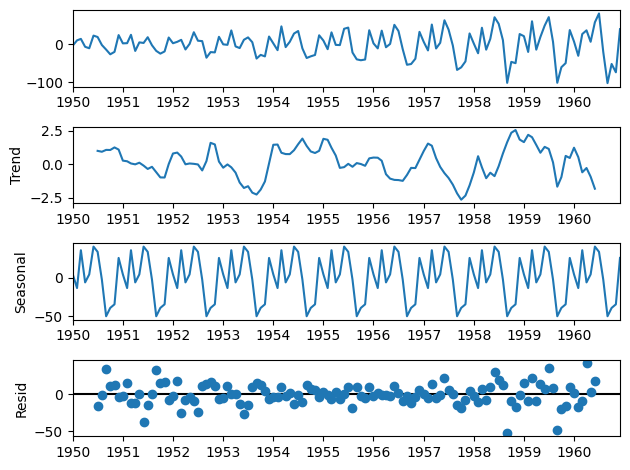

In [66]:
decompose_result = seasonal_decompose(air_detrended_diff.dropna())
decompose_result.plot();

In [65]:
#Dickyfuller test for seasonality
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(air_detrended_diff.dropna().values,autolag = 'AIC')
print('1.ADF:',dftest[0])
print('2. P-value',dftest[1])
print('3. Num of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5. Critical Values:')
for key,val in dftest[4].items():
    print("\t",key,':',val)

1.ADF: -3.1544826348635864
2. P-value 0.02277526496785854
3. Num of lags: 12
4.No of observations: 119
5. Critical Values:
	 1% : -3.4865346059036564
	 5% : -2.8861509858476264
	 10% : -2.579896092790057


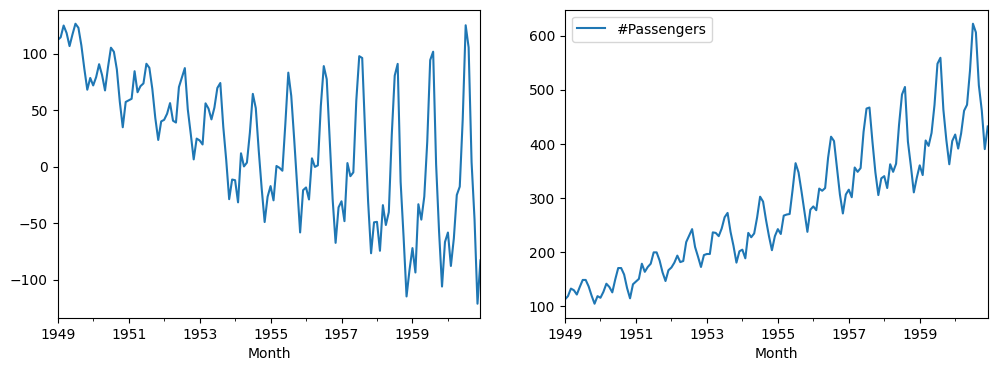

In [71]:
from statsmodels.regression.linear_model import OLS
least_squares = OLS(air['#Passengers'].values, list(range(air.shape[0])))
result = least_squares.fit()
fit = pd.Series(result.predict(list(range(air.shape[0]))), index = air.index)
air_ols_detrended = air['#Passengers'] - fit
ax1 = plt.subplot(121)
air_ols_detrended.plot(figsize=(12,4),ax=ax1);
ax2 = plt.subplot(122)
air.plot(figsize=(12,4),ax=ax2);

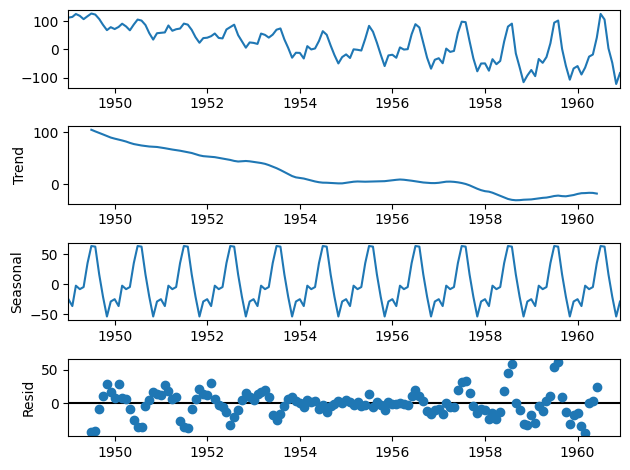

In [72]:
decompose_result = seasonal_decompose(air_ols_detrended.dropna())
decompose_result.plot();

<AxesSubplot: xlabel='Month'>

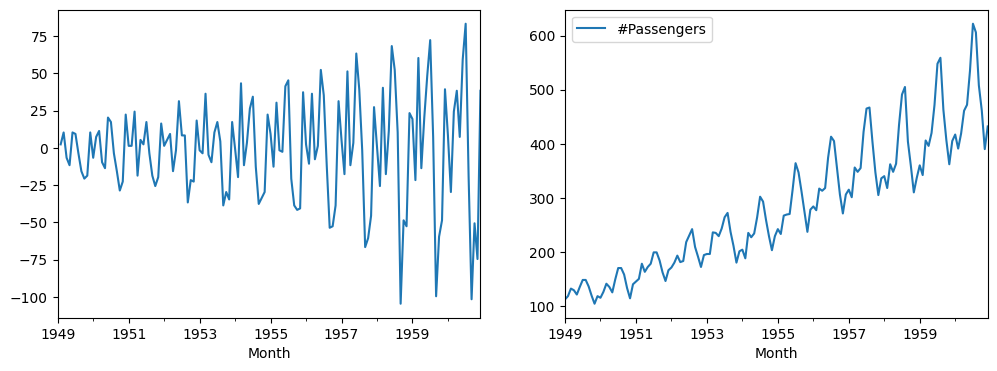

In [73]:
air_ols_detrended_diff = air_ols_detrended -air_ols_detrended.shift()
ax1 = plt.subplot(1,2,1)
air_ols_detrended_diff.plot(figsize=(12,4),ax=ax1)
ax2 = plt.subplot(1,2,2)
air.plot(figsize=(12,4),ax=ax2)

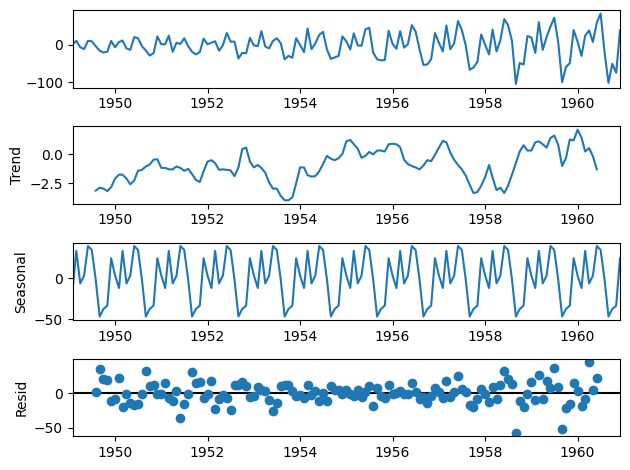

In [74]:
decompose_result = seasonal_decompose(air_ols_detrended_diff.dropna())
decompose_result.plot();